# Planetary Motion in 2D


## Imports and main struct
The goal of this notebook is to simulate a two body system 
using the Euler-Cromer method. A subsidiary goal is to use 
(for the first time) a struct, and see how to use it effectively.
In the definition of the struct, you will see that both the 
position and velocity are stored as a vector of vectors, 
which can be a confusing structure; you'll hopefully not be
confused by the end :-).

In [7]:
using LinearAlgebra
using Plots

# Define a structure to hold the state of a body
mutable struct Body
    name::String
    m::Float64
    r::Vector{Vector{Float64}}
    v::Vector{Vector{Float64}}
end

### Define a boatload of constants

In [13]:

# Gravitational constant
const G = 6.67430e-11  # m^3 kg^-1 s^-2
const day = 86400.0     # seconds in a day
const year = 365.25 * day  # seconds in a year
const AU = 1.496e11    # meters
const Earth_mass = 5.972e24  # kg
const Moon_mass = 7.348e22   # kg
const Earth_radius = 6.371e6  # meters
const Moon_radius = 1.737e6    # meters
const Earth_Moon_distance = 3.844e8  # meters
const Moon_orbital_velocity = 1022.0  # m/s
const total_time = 90.0 * day  # total simulation time
const Δt = 60.0  # time step in seconds
const num_steps = Int(total_time / Δt)
const output_interval = Int(day / Δt)  # output every day

# Define the two bodies we will simulate: Earth and Moon
const num_bodies = 2
const body_names = ["Earth", "Moon"]
const body_masses = [Earth_mass, Moon_mass]
const body_radii = [Earth_radius, Moon_radius]
const body_initial_positions = [ [0.0, 0.0, 0.0], [Earth_Moon_distance, 0.0, 0.0] ]
const body_initial_velocities = [ [0.0, -Moon_mass*Moon_orbital_velocity/Earth_mass, 0.0], [0.0, Moon_orbital_velocity, 0.0] ]


2-element Vector{Vector{Float64}}:
 [0.0, -12.574775619557936, 0.0]
 [0.0, 1022.0, 0.0]

### Now initialize the system 
I'll use just the earth and the moon for this first simulation.
I'll also define a function to compute a single Euler-Cromer step;
this function will return the change in velocity for objects i and j. 

In [14]:

# Initialize bodies
bodies = Body[]
for i in 1:num_bodies
    push!(bodies, 
          Body(body_names[i], 
          body_masses[i], 
          [body_initial_positions[i]], 
          [body_initial_velocities[i]])
        )
end
bodies 

2-element Vector{Body}:
 Body("Earth", 5.972e24, [[0.0, 0.0, 0.0]], [[0.0, -12.574775619557936, 0.0]])
 Body("Moon", 7.348e22, [[3.844e8, 0.0, 0.0]], [[0.0, 1022.0, 0.0]])

In [15]:

# Function to compute the change in velocities for each body due to gravitational forces
function Δv(b1::Body, b2::Body)    
    r_vec = b2.r[end] .- b1.r[end]
    r_mag = norm(r_vec)
    force = G * b1.m * b2.m / r_mag^2
    Δv1 = force * Δt *(r_vec / r_mag) / b1.m
    Δv2 = -force * Δt *(r_vec / r_mag) / b2.m
    return Δv1, Δv2
end


Δv (generic function with 1 method)

### Now implement the Euler-Cromer method 
Note that the code below allows one to use more than two bodies ---
at least I think this will work (I've only tried it for this two body 
system so far.

In [16]:

# now use the Euler-Cromer method to update positions and velocities
function EC_Method!(bodies::Vector{Body})    
    for step in 2:num_steps
        # Compute all pairwise gravitational interactions
        for i in 1:length(bodies)-1
            for j in i+1:length(bodies)
                Δv1, Δv2 = Δv(bodies[i], bodies[j])
                push!(bodies[i].v, bodies[i].v[end] .+ Δv1)
                push!(bodies[j].v, bodies[j].v[end] .+ Δv2)
            end
        end
        # Update positions based on new velocities
        for body in bodies
            push!(body.r, body.r[end] .+ body.v[end] .* Δt)
        end
        
        # Output positions at specified intervals
        # Can comment this out if too much output...
        #if step % output_interval == 0
        #    println("Day $(step * Δt / day):")
        #    for body in bodies
        #        println("$(body.name): Position = $(body.r[end]), Velocity = $(body.v[end])")
        #    end
        #    println()
        #end
    end
end


EC_Method! (generic function with 1 method)

### Now run the simulation and plot the results

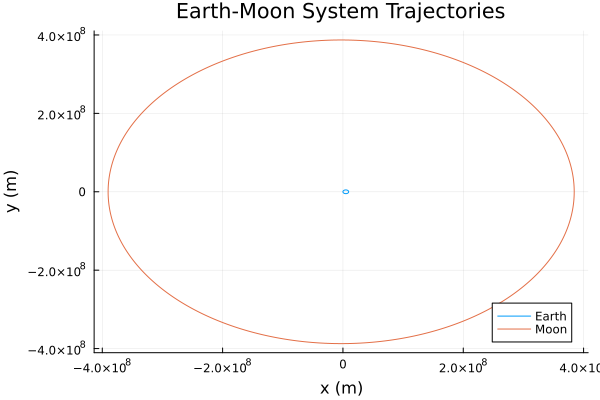

In [17]:

EC_Method!(bodies)
# Plotting the trajectories
p = plot()
for body in bodies
    xs = [pos[1] for pos in body.r]
    ys = [pos[2] for pos in body.r]
    plot!(xs, ys, label=body.name)
end
xlabel!("x (m)")
ylabel!("y (m)")
title!("Earth-Moon System Trajectories")
#savefig("earth_moon_trajectory.png")
#println("Plot saved to earth_moon_trajectory.png")
display(p)